---
title: Regression
format: html
bibliography: project_reference.bib
---

## Introduction

Within this tab I will train a regression decision tree in order to see how well it does at predicting "value" which is the percentage of policy relating to ocean sustainability per year. 

Different than classfication, regression predicts a continuous output versus a class. Therefore, I will not be using the binned_values that I created in the regression tab. 

## Decision Trees - Regression 

### Importing Libraries and Data

In [22]:
#| code-fold: true
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

trees = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")


### Decision Tree Regressor

Below I have created a decision tree regressor instance, made predictions on the testing set and evaluated how this model is performing using Mean Squared Error. 

Mean Squared Error (MES) is used to measure the average squared difference between the actual (observed) values and the predicted values in a regression task.

In [15]:
#| code-fold: true

# X is all features besides 'Value' and 'Country'
X = trees.drop(['Value', 'Country'], axis=1)
y = trees['Value']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree regressor object
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on Test Set:", mse)

Mean Squared Error (MSE) on Test Set: 143.98903096774194


With a MSE of 143 it can be inferred that on average, the sqaured difference between the predicted values and actual values is 143. This can be improved and we can do this through hyperparameter tuning. Below is a histogram of the target variable, to show that this model has room for improvement. 

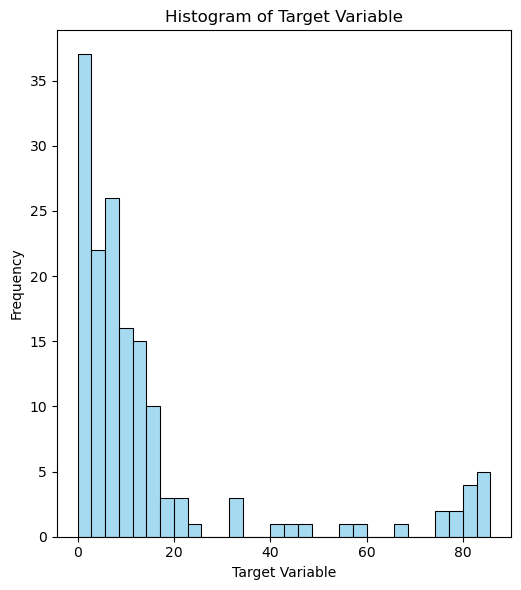

In [17]:
#| code-fold: true

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_test, bins=30, kde=False, color='skyblue')
plt.title('Histogram of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Hyperparameter Tuning

The code used below can help us find the optimal hyperparameters. 

*Note* Will fix errors later / find a better way to do this

In [21]:
#| code-fold: true

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# What Hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the "best" model for predictions
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on Test Set:", mse)

Best Hyperparameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean Squared Error (MSE) on Test Set: 59.58027989311377


/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
138 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/kendallgilbert/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate

Based off of the hyperparameter tuning completed above, we now have a model that has a significantly lower MSE. 

### Important Features

Furthermore, I explored which features have the most impact on making predictions. The higher the importance, the more influential the feature is in predicting the target variable. As shown below, instruments has the highest amount of importance. This is interesting as instruments was also the initial root node within the classification decision tree. The second most important feature was marine protected area. 


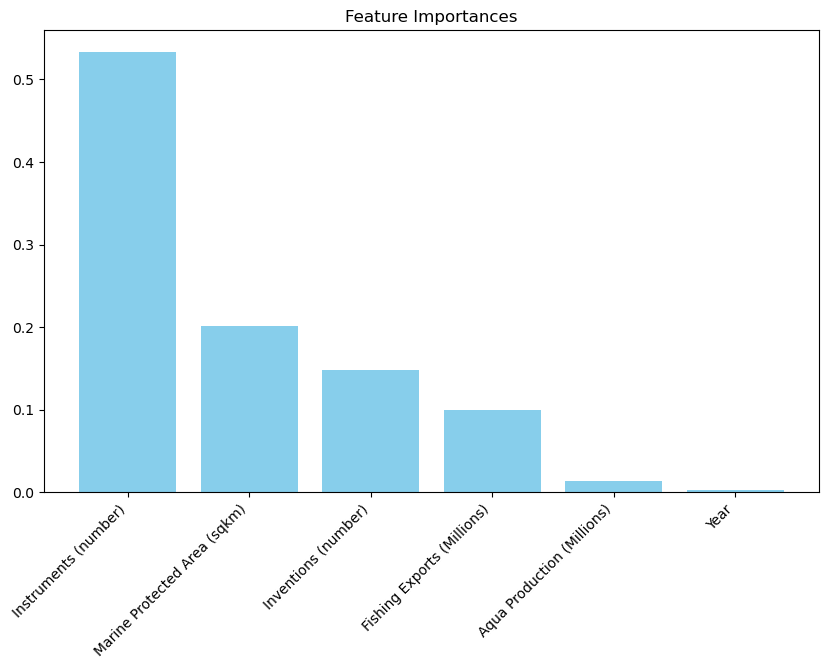

In [8]:
#| code-fold: true

# Get feature importances
feature_importances = regressor.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importances')
plt.show()

## Random Forests

Furthermore I complete random forests in an attempt to lower the MSE. The MSE is lower than the original decision tree, but not lower than the decision tree with the refined hyperparameters.


In [11]:
#| code-fold: true

# Random Forest Regressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# MSE of random forest
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on Test Set:", mse)


Mean Squared Error (MSE) on Test Set: 60.85859641316127


## Results and Conclusions

Overall this decision tree helped us understand a few key things about my data. 

- Policy Instruments and Marine Protected Area have a impact on making prediction on how much percentage a country will have policy relating to ocean sustainability.
- Policy instruments include a variety of policy so it is beneficial to see that policy that is not directly relating to ocean sustainability has an impact on ocean policy!
- Marine Protected Area being a predictor of ocean sustainability policy also tells us that countries that have more MPA may be inclined to continue to make ocean related policy seeing the benefits of this MPA (like fishing exports as shown by EDA)
